In [1]:
!pip install -q ultralytics
!pip install -Uq ipywidgets

# Для Модели YOLO 70 эпох

In [2]:
import os
import numpy as np
import pandas as pd
from sklearn.metrics import precision_score, recall_score, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from ultralytics import YOLO
from PIL import Image

In [3]:
# Загрузка модели
model_path = '/kaggle/input/yolo_last/keras/default/1/last.pt'
model = YOLO(model_path)

In [4]:
# Путь к папке с тестовыми изображениями
test_path = '/kaggle/input/binary-coco-first-article/test'


In [5]:
# Список для хранения результатов
results_list = []

# Словарь для хранения соответствия меток классов
class_names = {0: 'healthy', 1: 'unhealthy'}

In [6]:

# Перебор всех файлов в папке и подкаталогах
for root, dirs, files in os.walk(test_path):
    for file in files:
        if file.lower().endswith(('.png', '.jpg', '.jpeg')):
            img_path = os.path.join(root, file)
        
            # Выполнение инференса
            results = model(img_path)  # Возвращает список объектов Results
            
            for result in results:
                # Извлечение данных
                if result.probs is not None:
                    top_class = result.probs.top1  # Индекс класса с наибольшей вероятностью
                    confidence = result.probs.top1conf.item()  # Уверенность для этого класса
                    
                    # Определение истинного класса на основе структуры папок
                    if 'unhealthy' in os.path.basename(root):
                        true_class = 1
                    elif 'healthy' in os.path.basename(root):
                        true_class = 0

                    
                    results_list.append({
                        'Image': file,
                        'TrueClass': true_class,
                        'PredClass': top_class,
                        'Confidence': confidence
                    })
                    print(f"Файл: {file}, Истинный класс: {true_class}, Предсказанный класс: {top_class}, Уверенность: {confidence}")



image 1/1 /kaggle/input/binary-coco-first-article/test/healthy/32af75c2-4cf6-47db-8fa1-47c0455a0bc4.4.jpg: 640x640 healthy 0.79, unhealthy 0.21, 133.3ms
Speed: 79.8ms preprocess, 133.3ms inference, 0.1ms postprocess per image at shape (1, 3, 640, 640)
Файл: 32af75c2-4cf6-47db-8fa1-47c0455a0bc4.4.jpg, Истинный класс: 0, Предсказанный класс: 0, Уверенность: 0.7865724563598633

image 1/1 /kaggle/input/binary-coco-first-article/test/healthy/28a6b5bb-08ac-4fa7-9ea6-f23fe3705e2f.3.jpg: 640x640 healthy 1.00, unhealthy 0.00, 67.4ms
Speed: 38.7ms preprocess, 67.4ms inference, 0.1ms postprocess per image at shape (1, 3, 640, 640)
Файл: 28a6b5bb-08ac-4fa7-9ea6-f23fe3705e2f.3.jpg, Истинный класс: 0, Предсказанный класс: 0, Уверенность: 0.9983929991722107

image 1/1 /kaggle/input/binary-coco-first-article/test/healthy/4608554f-8743-4ecb-88a1-8c008a64e412.7.jpg: 640x640 healthy 0.76, unhealthy 0.24, 71.0ms
Speed: 35.9ms preprocess, 71.0ms inference, 0.1ms postprocess per image at shape (1, 3, 640, 

In [7]:
# Создание DataFrame из результатов
results_df = pd.DataFrame(results_list)
results_df

,Image,TrueClass,PredClass,Confidence
0,32af75c2-4cf6-47db-8fa1-47c0455a0bc4.4.jpg,0,0,0.786572
1,28a6b5bb-08ac-4fa7-9ea6-f23fe3705e2f.3.jpg,0,0,0.998393
2,4608554f-8743-4ecb-88a1-8c008a64e412.7.jpg,0,0,0.762411
3,4608554f-8743-4ecb-88a1-8c008a64e412.3.jpg,0,0,0.999974
4,32af75c2-4cf6-47db-8fa1-47c0455a0bc4.8.jpg,0,0,0.907467
...,...,...,...,...
75,57a3967c-c9c4-47c0-be9a-8acd59ee7212.8.jpg,1,1,1.000000
76,e7333ab8-8aa3-4fe6-a953-d88ffb99aabd.10.jpg,1,1,1.000000
77,67a926fa-506f-4d11-bda3-583843df4486.23.jpg,1,1,0.999999
78,1c8f7542-4368-4877-9087-125a67723f2d.19.jpg,1,1,1.000000


Precision: 0.9259
Recall: 1.0000
Accuracy: 0.9500


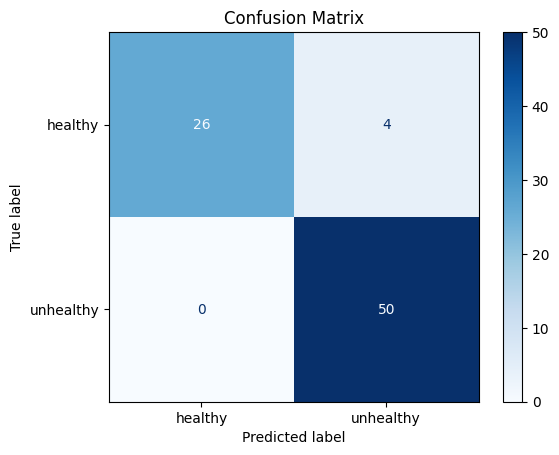

Результаты сохранены в /kaggle/working/results/results.csv


In [8]:

# Подсчет метрик
precision = precision_score(results_df['TrueClass'], results_df['PredClass'])
recall = recall_score(results_df['TrueClass'], results_df['PredClass'])
accuracy = accuracy_score(results_df['TrueClass'], results_df['PredClass'])

# Вывод метрик
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'Accuracy: {accuracy:.4f}')

# Построение матрицы путаницы
conf_matrix = confusion_matrix(results_df['TrueClass'], results_df['PredClass'])
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=[class_names[0], class_names[1]])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

# Сохранение результатов в CSV
results_dir = '/kaggle/working/results'
os.makedirs(results_dir, exist_ok=True)
csv_path = os.path.join(results_dir, 'results.csv')
results_df.to_csv(csv_path, index=False)

# Вывод результата
print(f'Результаты сохранены в {csv_path}')



In [9]:
import numpy as np
import pandas as pd
from sklearn.utils import resample

# Загрузка данных из CSV файла
csv_path = '/kaggle/working/results/results.csv'
df = pd.read_csv(csv_path)

# Выбор столбца с вероятностями для одного эксперимента (например, Pred_Exp_1)
prob_column = 'PredClass'
probs = df[prob_column].values

# Определение функции для вычисления бутстраппинг-доверительных интервалов
def bootstrap_ci(data, num_iterations=1000, ci=0.95):
    """ Compute the confidence interval for the mean using bootstrap resampling. """
    n = len(data)
    means = np.zeros(num_iterations)
    
    for i in range(num_iterations):
        sample = resample(data, n_samples=n, replace=True)
        means[i] = np.mean(sample)
    
    lower_bound = np.percentile(means, (1 - ci) / 2 * 100)
    upper_bound = np.percentile(means, (1 + ci) / 2 * 100)
    
    return lower_bound, upper_bound

# Рассчитываем доверительные интервалы для вероятностей
lower, upper = bootstrap_ci(probs)

# Вывод результатов
print(f'95% доверительный интервал для вероятностей {prob_column}: [{lower:.4f}, {upper:.4f}]')


95% доверительный интервал для вероятностей PredClass: [0.5625, 0.7750]


# Для Модели YOLO 100 эпох

In [10]:
import os
import numpy as np
import pandas as pd
from sklearn.metrics import precision_score, recall_score, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from ultralytics import YOLO
from PIL import Image

In [11]:
# Загрузка модели
model_2_path = '/kaggle/input/yolo_100/keras/default/1/last (1).pt'
model_2 = YOLO(model_path)

In [12]:
# Путь к папке с тестовыми изображениями
test_path = '/kaggle/input/binary-coco-first-article/test'


In [13]:
# Список для хранения результатов
results_list = []

# Словарь для хранения соответствия меток классов
class_names = {0: 'healthy', 1: 'unhealthy'}

In [14]:

# Перебор всех файлов в папке и подкаталогах
for root, dirs, files in os.walk(test_path):
    for file in files:
        if file.lower().endswith(('.png', '.jpg', '.jpeg')):
            img_path = os.path.join(root, file)
        
            # Выполнение инференса
            results = model_2(img_path)  # Возвращает список объектов Results
            
            for result in results:
                # Извлечение данных
                if result.probs is not None:
                    top_class = result.probs.top1  # Индекс класса с наибольшей вероятностью
                    confidence = result.probs.top1conf.item()  # Уверенность для этого класса
                    
                    # Определение истинного класса на основе структуры папок
                    if 'unhealthy' in os.path.basename(root):
                        true_class = 1
                    elif 'healthy' in os.path.basename(root):
                        true_class = 0

                    
                    results_list.append({
                        'Image': file,
                        'TrueClass': true_class,
                        'PredClass': top_class,
                        'Confidence': confidence
                    })
                    print(f"Файл: {file}, Истинный класс: {true_class}, Предсказанный класс: {top_class}, Уверенность: {confidence}")



image 1/1 /kaggle/input/binary-coco-first-article/test/healthy/32af75c2-4cf6-47db-8fa1-47c0455a0bc4.4.jpg: 640x640 healthy 0.79, unhealthy 0.21, 71.2ms
Speed: 36.2ms preprocess, 71.2ms inference, 0.1ms postprocess per image at shape (1, 3, 640, 640)
Файл: 32af75c2-4cf6-47db-8fa1-47c0455a0bc4.4.jpg, Истинный класс: 0, Предсказанный класс: 0, Уверенность: 0.7865724563598633

image 1/1 /kaggle/input/binary-coco-first-article/test/healthy/28a6b5bb-08ac-4fa7-9ea6-f23fe3705e2f.3.jpg: 640x640 healthy 1.00, unhealthy 0.00, 62.0ms
Speed: 36.1ms preprocess, 62.0ms inference, 0.1ms postprocess per image at shape (1, 3, 640, 640)
Файл: 28a6b5bb-08ac-4fa7-9ea6-f23fe3705e2f.3.jpg, Истинный класс: 0, Предсказанный класс: 0, Уверенность: 0.9983929991722107

image 1/1 /kaggle/input/binary-coco-first-article/test/healthy/4608554f-8743-4ecb-88a1-8c008a64e412.7.jpg: 640x640 healthy 0.76, unhealthy 0.24, 66.4ms
Speed: 36.3ms preprocess, 66.4ms inference, 0.1ms postprocess per image at shape (1, 3, 640, 64

In [15]:
# Создание DataFrame из результатов
results_df_2 = pd.DataFrame(results_list)
results_df_2

,Image,TrueClass,PredClass,Confidence
0,32af75c2-4cf6-47db-8fa1-47c0455a0bc4.4.jpg,0,0,0.786572
1,28a6b5bb-08ac-4fa7-9ea6-f23fe3705e2f.3.jpg,0,0,0.998393
2,4608554f-8743-4ecb-88a1-8c008a64e412.7.jpg,0,0,0.762411
3,4608554f-8743-4ecb-88a1-8c008a64e412.3.jpg,0,0,0.999974
4,32af75c2-4cf6-47db-8fa1-47c0455a0bc4.8.jpg,0,0,0.907467
...,...,...,...,...
75,57a3967c-c9c4-47c0-be9a-8acd59ee7212.8.jpg,1,1,1.000000
76,e7333ab8-8aa3-4fe6-a953-d88ffb99aabd.10.jpg,1,1,1.000000
77,67a926fa-506f-4d11-bda3-583843df4486.23.jpg,1,1,0.999999
78,1c8f7542-4368-4877-9087-125a67723f2d.19.jpg,1,1,1.000000


Precision: 0.9259
Recall: 1.0000
Accuracy: 0.9500


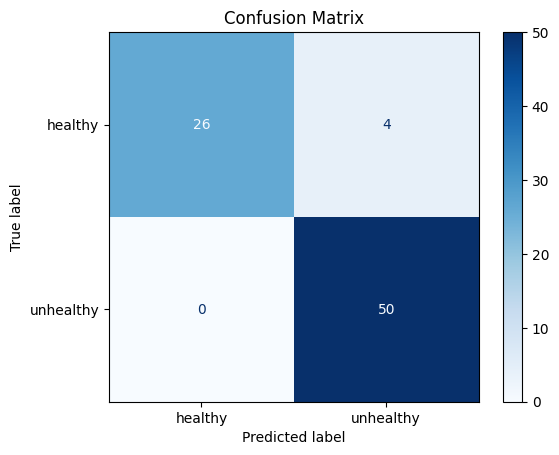

Результаты сохранены в /kaggle/working/results/results_2_100.csv


In [16]:

# Подсчет метрик
precision = precision_score(results_df_2['TrueClass'], results_df_2['PredClass'])
recall = recall_score(results_df_2['TrueClass'], results_df_2['PredClass'])
accuracy = accuracy_score(results_df_2['TrueClass'], results_df_2['PredClass'])

# Вывод метрик
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'Accuracy: {accuracy:.4f}')

# Построение матрицы путаницы
conf_matrix = confusion_matrix(results_df_2['TrueClass'], results_df_2['PredClass'])
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=[class_names[0], class_names[1]])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

# Сохранение результатов в CSV
results_dir = '/kaggle/working/results'
os.makedirs(results_dir, exist_ok=True)
csv_path = os.path.join(results_dir, 'results_2_100.csv')
results_df_2.to_csv(csv_path, index=False)

# Вывод результата
print(f'Результаты сохранены в {csv_path}')



In [17]:
import numpy as np
import pandas as pd
from sklearn.utils import resample

# Загрузка данных из CSV файла
csv_path = '/kaggle/working/results/results_2_100.csv'
df = pd.read_csv(csv_path)

# Выбор столбца с вероятностями для одного эксперимента (например, Pred_Exp_1)
prob_column = 'PredClass'
probs = df[prob_column].values

# Определение функции для вычисления бутстраппинг-доверительных интервалов
def bootstrap_ci(data, num_iterations=1000, ci=0.95):
    """ Compute the confidence interval for the mean using bootstrap resampling. """
    n = len(data)
    means = np.zeros(num_iterations)
    
    for i in range(num_iterations):
        sample = resample(data, n_samples=n, replace=True)
        means[i] = np.mean(sample)
    
    lower_bound = np.percentile(means, (1 - ci) / 2 * 100)
    upper_bound = np.percentile(means, (1 + ci) / 2 * 100)
    
    return lower_bound, upper_bound

# Рассчитываем доверительные интервалы для вероятностей
lower, upper = bootstrap_ci(probs)

# Вывод результатов
print(f'95% доверительный интервал для вероятностей {prob_column}: [{lower:.4f}, {upper:.4f}]')


95% доверительный интервал для вероятностей PredClass: [0.5750, 0.7753]


In [18]:
results_df.loc[results_df['TrueClass']!=results_df['PredClass']]

,Image,TrueClass,PredClass,Confidence
6,32af75c2-4cf6-47db-8fa1-47c0455a0bc4.6.jpg,0,1,0.898747
15,28a6b5bb-08ac-4fa7-9ea6-f23fe3705e2f.4.jpg,0,1,0.595065
27,0e79cb06-beb7-47cd-abf2-e00927748e3c.6.jpg,0,1,0.693730
29,87191f33-68da-428b-8f39-0ed92bb4f2a7.4.jpg,0,1,0.709318


In [19]:
results_df_2.loc[results_df_2['TrueClass']!=results_df_2['PredClass']]

,Image,TrueClass,PredClass,Confidence
6,32af75c2-4cf6-47db-8fa1-47c0455a0bc4.6.jpg,0,1,0.898747
15,28a6b5bb-08ac-4fa7-9ea6-f23fe3705e2f.4.jpg,0,1,0.595065
27,0e79cb06-beb7-47cd-abf2-e00927748e3c.6.jpg,0,1,0.693730
29,87191f33-68da-428b-8f39-0ed92bb4f2a7.4.jpg,0,1,0.709318


In [20]:
results_df[results_df.PredClass == 1].describe()

,TrueClass,PredClass,Confidence
count,54.000000,54.0,54.000000
mean,0.925926,1.0,0.971712
std,0.264351,0.0,0.095546
min,0.000000,1.0,0.582278
25%,1.000000,1.0,0.999997
50%,1.000000,1.0,1.000000
75%,1.000000,1.0,1.000000
max,1.000000,1.0,1.000000


In [21]:
results_df_2[results_df.PredClass == 1].describe()

,TrueClass,PredClass,Confidence
count,54.000000,54.0,54.000000
mean,0.925926,1.0,0.971712
std,0.264351,0.0,0.095546
min,0.000000,1.0,0.582278
25%,1.000000,1.0,0.999997
50%,1.000000,1.0,1.000000
75%,1.000000,1.0,1.000000
max,1.000000,1.0,1.000000


In [22]:
results_df[results_df.PredClass == 0].describe()

,TrueClass,PredClass,Confidence
count,26.0,26.0,26.000000
mean,0.0,0.0,0.933907
std,0.0,0.0,0.113448
min,0.0,0.0,0.604273
25%,0.0,0.0,0.923784
50%,0.0,0.0,0.998677
75%,0.0,0.0,0.999983
max,0.0,0.0,1.000000


In [23]:
results_df_2[results_df.PredClass == 0].describe()

,TrueClass,PredClass,Confidence
count,26.0,26.0,26.000000
mean,0.0,0.0,0.933907
std,0.0,0.0,0.113448
min,0.0,0.0,0.604273
25%,0.0,0.0,0.923784
50%,0.0,0.0,0.998677
75%,0.0,0.0,0.999983
max,0.0,0.0,1.000000


In [24]:
results_df.describe()

,TrueClass,PredClass,Confidence
count,80.000000,80.00000,80.000000
mean,0.625000,0.67500,0.959425
std,0.487177,0.47133,0.102543
min,0.000000,0.00000,0.582278
25%,0.000000,0.00000,0.999542
50%,1.000000,1.00000,0.999998
75%,1.000000,1.00000,1.000000
max,1.000000,1.00000,1.000000


In [25]:
results_df_2.describe()

,TrueClass,PredClass,Confidence
count,80.000000,80.00000,80.000000
mean,0.625000,0.67500,0.959425
std,0.487177,0.47133,0.102543
min,0.000000,0.00000,0.582278
25%,0.000000,0.00000,0.999542
50%,1.000000,1.00000,0.999998
75%,1.000000,1.00000,1.000000
max,1.000000,1.00000,1.000000
